In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('results.csv', header=None)
data = data.to_numpy()

IndexError: index 13 is out of bounds for axis 0 with size 13

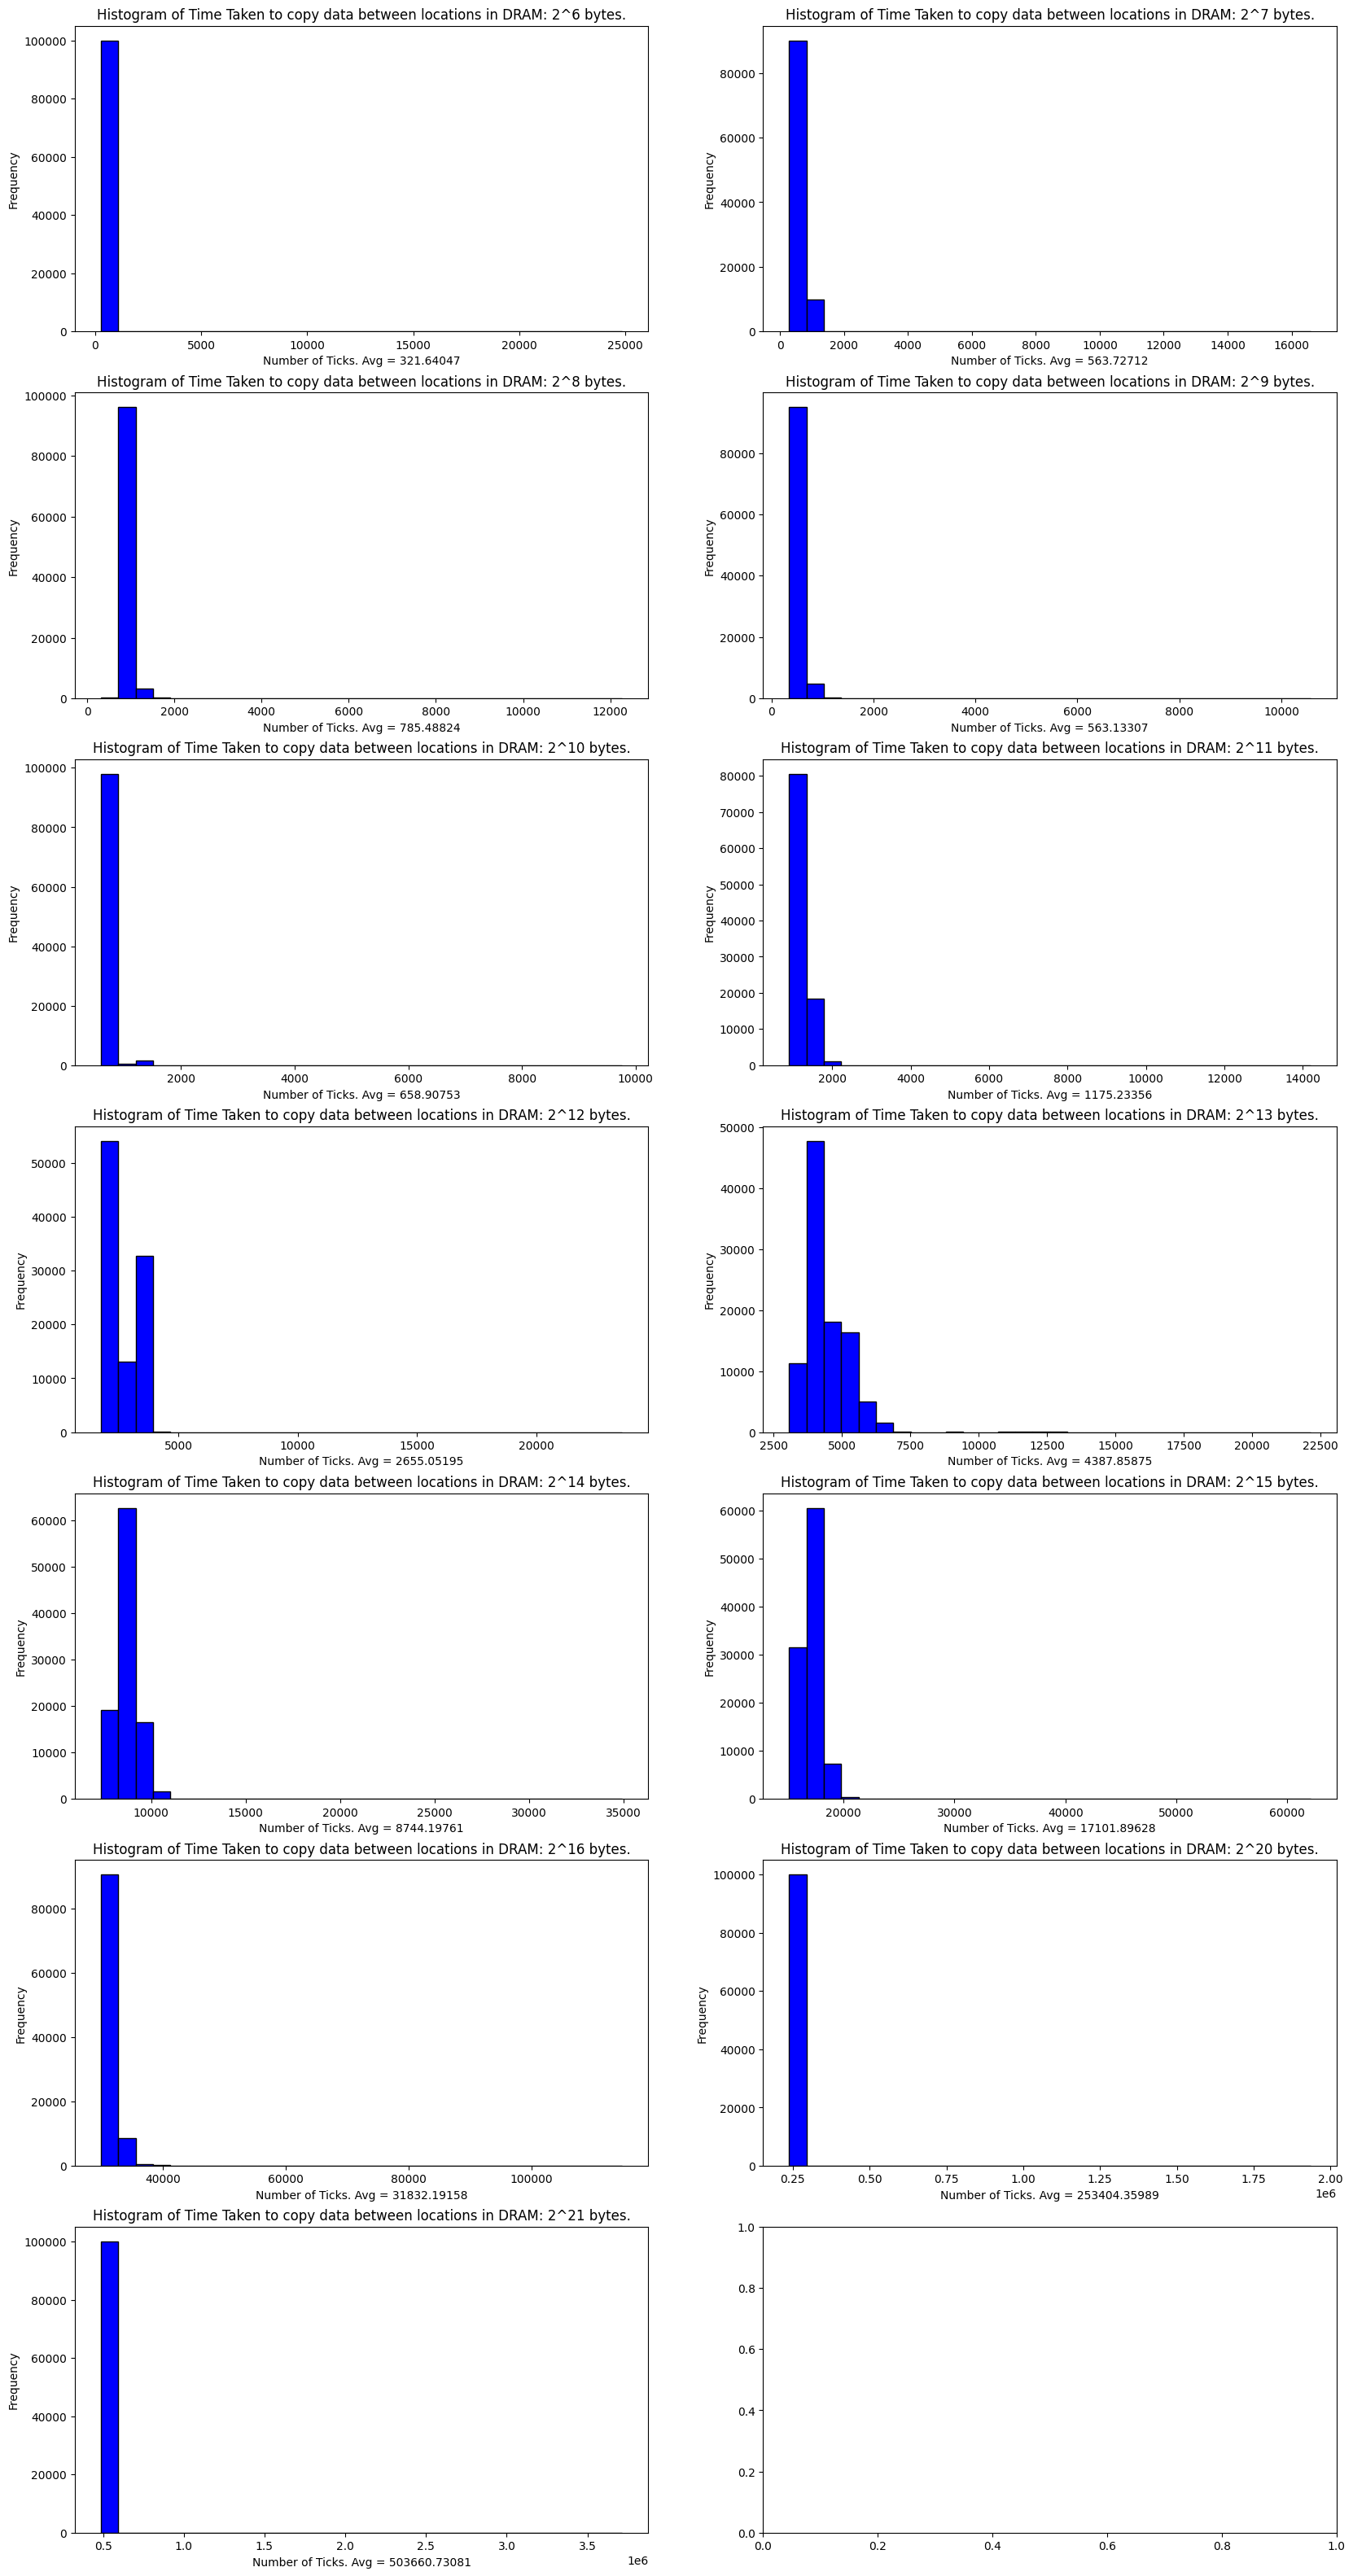

In [34]:
powers = [6,7,8,9,10,11,12,13,14,15,16,20,21]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 40)) # 1 row, 3 columns
axes = axes.flatten()

for i in range(len(data)):

    
    #plt.hist(trial_data, bins = 50)
    #plt.ylim(0, 10000)
    #plt.title()
    #plt.xlabel('Number of Ticks')
    #plt.show()
    

    # Plot each histogram in its respective subplot
    axes[i].hist(data[i], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f"Histogram of Time Taken to copy data between locations in DRAM: 2^{powers[i]} bytes.")
    #print(f'Mean: {np.mean(trial_data)}\n \n Std: {np.std(trial_data)}\n')

# Add common labels (optional)
i = 0
for ax in axes:
    if {i < 13}:
        ax.set_xlabel(f'Number of Ticks. Avg = {np.mean(data[i])}')
        ax.set_ylabel('Frequency')
        i+= 1

# Adjust layout for better spacing
plt.show()
    
# Mask the data so that we can filter out the outlying datapoints and get better histograms
# mask = trial_data <  np.mean(trial_data) + 1.5 * np.std(trial_data)
# filtered = trial_data[mask]
# mask = filtered >  np.mean(trial_data) - 1.5 * np.std(trial_data)
# filtered = filtered[mask]
    
'''
plt.hist(filtered, bins = 50)
#plt.ylim(0, 10000)
plt.title(f"Histogram of Time Taken to copy data between locations in DRAM: 2^{powers[i]} bytes. Cleaned Data.")
plt.xlabel('Number of Ticks')
plt.show()
'''
    

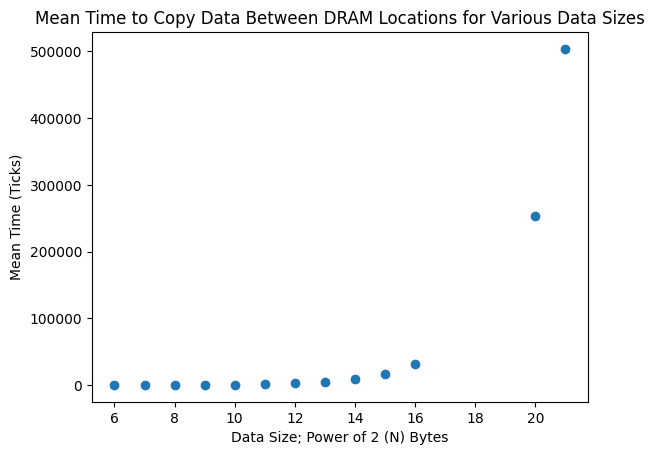

In [14]:
d = []
for i in range(len(data)):
    d.append(np.mean(data[i]))

plt.scatter(powers,d)
plt.title(f"Mean Time to Copy Data Between DRAM Locations for Various Data Sizes")
plt.xlabel('Data Size; Power of 2 (N) Bytes')
plt.ylabel('Mean Time (Ticks)')
plt.show()

# Q 3

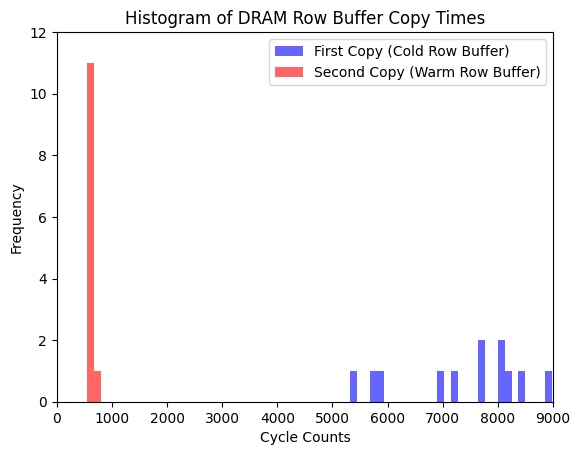

In [10]:
# Data: measured cycles for first and second copy times (not averages, multiple trials)
first_copy_times = [7742, 7162, 5834, 8218, 8426, 7732, 5708, 8120, 6984, 5342, 8094, 8982]
second_copy_times = [660, 668, 666, 664, 630, 656, 550, 640, 610, 554, 688, 628]

# Define consistent bins for both datasets
# Using the full range from min to max of both datasets
min_val = min(min(first_copy_times), min(second_copy_times))
max_val = max(max(first_copy_times), max(second_copy_times))
bins = np.linspace(min_val, max_val, 70)  # 30 bins across the full range

# Plot histogram with two overlapping datasets with consistent bins
plt.hist(first_copy_times, bins=bins, alpha=0.6, color='blue', label='First Copy (Cold Row Buffer)')
plt.hist(second_copy_times, bins=bins, alpha=0.6, color='red', label='Second Copy (Warm Row Buffer)')

plt.xlim(0, 9000)
plt.ylim(0, 12)

# Adding labels and title
plt.xlabel('Cycle Counts')
plt.ylabel('Frequency')
plt.title('Histogram of DRAM Row Buffer Copy Times')
plt.legend()

# Show plot
plt.show()